# Data Annotation

Data annotation was conducted using [Label Studio](https://labelstud.io/) because it is open source.

## Import Data

Radiographs are stored as TIFF files.
Because TIFF is **not** a format supported by web browsers,
we need to convert the TIFF files into PNG files.

In [1]:
#| echo: true
#| output: false
#| eval: false

import glob
import os.path

from PIL import Image

radiograph_tiff_path = "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0/"
radiograph_png_path = "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+png/"

for tiff_filename in glob.glob("*.tiff", root_dir=radiograph_tiff_path, recursive=True):
    im = Image.open(os.path.join(radiograph_tiff_path, tiff_filename))
    im.save(
        os.path.join(radiograph_png_path, tiff_filename.replace("tiff", "png")),
        format="PNG",
    )
    im.close()

## Classification

The first carpal bone, if present, is visible in the carpus dorsal 75º medial to palmarolateral oblique (DMPLO).
We created a project in Label Studio called "First Carpal Bone Classification", uploaded the carpus DMPLO radiographs to it, and configure the labeling interface using

In [2]:
#| output: true

with open("../labeling-interface/First Carpal Bone Classification.xml") as _file:
    configuration_file = _file.readlines()

print("".join(configuration_file))

<View>
  <Choices name="choice" toName="image">
    <Choice value="first carpal bone"/>
  </Choices>
  <Image name="image" value="$image"/>
</View>


After labeling the radiographs,
we downloaded the labels as a CSV file.

In [3]:
#| echo: true

import numpy as np
import pandas as pd

carpus_dmplo_df = pd.read_csv("../data-raw/First Carpal Bone Classification.csv")

In [4]:
carpus_dmplo_df.head()

image     id  \
0  http://localhost:8082/r/fore-carpus/dmplo/0036...  46384   
1  http://localhost:8082/r/fore-carpus/dmplo/0211...  46548   
2  http://localhost:8082/r/fore-carpus/dmplo/0210...  46547   
3  http://localhost:8082/r/fore-carpus/dmplo/0209...  46546   
4  http://localhost:8082/r/fore-carpus/dmplo/0208...  46545   

              choice  annotator  annotation_id                   created_at  \
0  first carpal bone          1          30995  2022-04-28T05:55:51.653206Z   
1                NaN          1          31159  2022-04-28T06:03:38.690955Z   
2                NaN          1          31158  2022-04-28T06:03:37.324285Z   
3                NaN          1          31157  2022-04-28T06:03:36.002270Z   
4                NaN          1          31156  2022-04-28T06:03:34.719745Z   

                    updated_at  lead_time  
0  2022-04-28T05:55:56.049001Z    489.393  
1  2022-04-28T06:03:38.691002Z      0.877  
2  2022-04-28T06:03:37.324333Z      0.917  
3  2022-04-28T06:03:36.002314Z      0.882  
4  2022-04-28T06:03:34.719798Z      0.924

In [5]:
#| output: true

carpus_dmplo_style = carpus_dmplo_df.head().style
carpus_dmplo_style.hide(axis="index")
carpus_dmplo_style.set_table_styles(
    [
        {"selector": "tr", "props": [("white-space", "nowrap")]},
        {"selector": "th", "props": [("padding", "0 0.5em")]},
        {"selector": "td", "props": [("padding", "0 0.5em")]},
    ]
)

The column `image` need to be corrected to relative path and TIFF format.

In [6]:
#| echo: true

carpus_dmplo_df["image"] = carpus_dmplo_df["image"].str.replace(
    "http://localhost:8082/", ""
)
carpus_dmplo_df["image"] = carpus_dmplo_df["image"].str.replace("png", "tiff")

In [7]:
carpus_dmplo_df.head()

image     id             choice  annotator  \
0  r/fore-carpus/dmplo/0036.tiff  46384  first carpal bone          1   
1  r/fore-carpus/dmplo/0211.tiff  46548                NaN          1   
2  r/fore-carpus/dmplo/0210.tiff  46547                NaN          1   
3  r/fore-carpus/dmplo/0209.tiff  46546                NaN          1   
4  r/fore-carpus/dmplo/0208.tiff  46545                NaN          1   

   annotation_id                   created_at                   updated_at  \
0          30995  2022-04-28T05:55:51.653206Z  2022-04-28T05:55:56.049001Z   
1          31159  2022-04-28T06:03:38.690955Z  2022-04-28T06:03:38.691002Z   
2          31158  2022-04-28T06:03:37.324285Z  2022-04-28T06:03:37.324333Z   
3          31157  2022-04-28T06:03:36.002270Z  2022-04-28T06:03:36.002314Z   
4          31156  2022-04-28T06:03:34.719745Z  2022-04-28T06:03:34.719798Z   

   lead_time  
0    489.393  
1      0.877  
2      0.917  
3      0.882  
4      0.924

A column with the horse ID is needed.

In [8]:
#| echo: true

carpus_dmplo_df["horse_id"] = carpus_dmplo_df["image"].str.replace(
    "r/fore-carpus/dmplo/", "", regex=False
)
carpus_dmplo_df["horse_id"] = carpus_dmplo_df["horse_id"].str.replace(
    "l/fore-carpus/dmplo/", "", regex=False
)
carpus_dmplo_df["horse_id"] = carpus_dmplo_df["horse_id"].str.replace(
    ".tiff", "", regex=False
)

In [9]:
carpus_dmplo_df.head()

image     id             choice  annotator  \
0  r/fore-carpus/dmplo/0036.tiff  46384  first carpal bone          1   
1  r/fore-carpus/dmplo/0211.tiff  46548                NaN          1   
2  r/fore-carpus/dmplo/0210.tiff  46547                NaN          1   
3  r/fore-carpus/dmplo/0209.tiff  46546                NaN          1   
4  r/fore-carpus/dmplo/0208.tiff  46545                NaN          1   

   annotation_id                   created_at                   updated_at  \
0          30995  2022-04-28T05:55:51.653206Z  2022-04-28T05:55:56.049001Z   
1          31159  2022-04-28T06:03:38.690955Z  2022-04-28T06:03:38.691002Z   
2          31158  2022-04-28T06:03:37.324285Z  2022-04-28T06:03:37.324333Z   
3          31157  2022-04-28T06:03:36.002270Z  2022-04-28T06:03:36.002314Z   
4          31156  2022-04-28T06:03:34.719745Z  2022-04-28T06:03:34.719798Z   

   lead_time horse_id  
0    489.393     0036  
1      0.877     0211  
2      0.917     0210  
3      0.882     0209  
4      0.924     0208

And a bollean column for the first carpal bone is needed.

In [10]:
#| echo: true

carpus_dmplo_df["first carpal bone"] = carpus_dmplo_df["choice"] == "first carpal bone"

In [11]:
carpus_dmplo_df.head()

image     id             choice  annotator  \
0  r/fore-carpus/dmplo/0036.tiff  46384  first carpal bone          1   
1  r/fore-carpus/dmplo/0211.tiff  46548                NaN          1   
2  r/fore-carpus/dmplo/0210.tiff  46547                NaN          1   
3  r/fore-carpus/dmplo/0209.tiff  46546                NaN          1   
4  r/fore-carpus/dmplo/0208.tiff  46545                NaN          1   

   annotation_id                   created_at                   updated_at  \
0          30995  2022-04-28T05:55:51.653206Z  2022-04-28T05:55:56.049001Z   
1          31159  2022-04-28T06:03:38.690955Z  2022-04-28T06:03:38.691002Z   
2          31158  2022-04-28T06:03:37.324285Z  2022-04-28T06:03:37.324333Z   
3          31157  2022-04-28T06:03:36.002270Z  2022-04-28T06:03:36.002314Z   
4          31156  2022-04-28T06:03:34.719745Z  2022-04-28T06:03:34.719798Z   

   lead_time horse_id  first carpal bone  
0    489.393     0036               True  
1      0.877     0211              False  
2      0.917     0210              False  
3      0.882     0209              False  
4      0.924     0208              False

The information need to be enriched with previous annotations. 

In [12]:
#| echo: true

all_radiographs_df = pd.read_csv(
    "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0/data.csv"
)

In [13]:
all_radiographs_df.head()

id                     view                               tiff  height  \
0   0      L FORE CARPUS DLPMO      l/fore-carpus/dlpmo/0000.tiff    2560   
1   0      L FORE CARPUS DMPLO      l/fore-carpus/dmplo/0000.tiff    2560   
2   0         L FORE CARPUS DP         l/fore-carpus/dp/0000.tiff    2560   
3   0  L FORE CARPUS FLEXED DP  l/fore-carpus/flexed-dp/0000.tiff    2048   
4   0  L FORE CARPUS FLEXED LM  l/fore-carpus/flexed-lm/0000.tiff    2560   

   width  uncollimated beam  side marker  lateral marker   shoe  shoe nail  \
0   2048              False        False           False  False      False   
1   2048               True        False           False  False      False   
2   2048               True        False           False  False      False   
3   2560               True        False           False  False      False   
4   2048               True        False           False  False      False   

   chain    pen  needle  lead glove  flipped  margin       use  
0  False  False   False       False    False   False  training  
1  False  False   False       False    False   False  training  
2  False  False   False       False    False   False  training  
3  False  False   False       False    False   False  training  
4  False  False   False       False    False   False  training

In [14]:
#| echo: true

carpus_dmplo_df_enriched = carpus_dmplo_df.merge(
    all_radiographs_df, left_on="image", right_on="tiff", how="inner"
)

In [15]:
carpus_dmplo_df_enriched.head()

image   id_x             choice  annotator  \
0  r/fore-carpus/dmplo/0036.tiff  46384  first carpal bone          1   
1  r/fore-carpus/dmplo/0211.tiff  46548                NaN          1   
2  r/fore-carpus/dmplo/0210.tiff  46547                NaN          1   
3  r/fore-carpus/dmplo/0209.tiff  46546                NaN          1   
4  r/fore-carpus/dmplo/0208.tiff  46545                NaN          1   

   annotation_id                   created_at                   updated_at  \
0          30995  2022-04-28T05:55:51.653206Z  2022-04-28T05:55:56.049001Z   
1          31159  2022-04-28T06:03:38.690955Z  2022-04-28T06:03:38.691002Z   
2          31158  2022-04-28T06:03:37.324285Z  2022-04-28T06:03:37.324333Z   
3          31157  2022-04-28T06:03:36.002270Z  2022-04-28T06:03:36.002314Z   
4          31156  2022-04-28T06:03:34.719745Z  2022-04-28T06:03:34.719798Z   

   lead_time horse_id  first carpal bone  ...  lateral marker   shoe  \
0    489.393     0036               True  ...           False  False   
1      0.877     0211              False  ...           False  False   
2      0.917     0210              False  ...           False  False   
3      0.882     0209              False  ...           False  False   
4      0.924     0208              False  ...           False  False   

  shoe nail  chain    pen  needle  lead glove  flipped  margin         use  
0     False  False  False   False       False    False   False        test  
1     False  False  False   False       False    False   False    training  
2     False  False  False   False       False    False   False  validation  
3     False  False  False   False       False    False   False    training  
4     False  False  False   False        True    False   False    training  

[5 rows x 27 columns]

In [16]:
#| echo: true

carpus_dmplo_df_enriched_min = carpus_dmplo_df_enriched.loc[
    :,
    [
        "horse_id",
        "image",
        "height",
        "width",
        "uncollimated beam",
        "side marker",
        "lateral marker",
        "margin",
        "first carpal bone",
    ],
]
carpus_dmplo_df_enriched_min.sort_values("horse_id", inplace=True)

In [17]:
#| output: true

carpus_dmplo_style = carpus_dmplo_df_enriched_min.head().style
carpus_dmplo_style.hide(axis="index")
carpus_dmplo_style.set_table_styles(
    [
        {"selector": "tr", "props": [("white-space", "nowrap")]},
        {"selector": "th", "props": [("padding", "0 0.5em")]},
        {"selector": "td", "props": [("padding", "0 0.5em")]},
    ]
)

In [18]:
carpus_dmplo_df_enriched_min_by_horse = carpus_dmplo_df_enriched_min.groupby("horse_id")

In [19]:
agg_carpus_dmplo_df_enriched_min_by_horse = (
    carpus_dmplo_df_enriched_min_by_horse.aggregate(np.any).reset_index()
)

Let's visualise the information using seaborn.

In [20]:
#| echo: true

import seaborn as sns

What is the distribution of uncollimated beam in the radiographs?

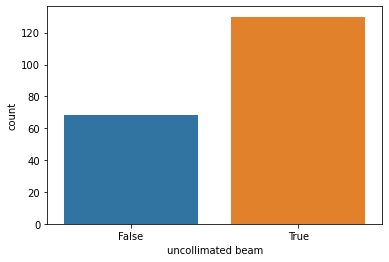

In [21]:
#| echo: true
#| output: true

_ = sns.countplot(data=agg_carpus_dmplo_df_enriched_min_by_horse, x="uncollimated beam")

What is the distribution of side marker in the radiographs?

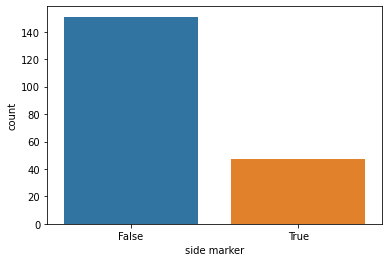

In [22]:
#| echo: true
#| output: true

_ = sns.countplot(data=agg_carpus_dmplo_df_enriched_min_by_horse, x="side marker")

What is the distribution of lateral marker in the radiographs?

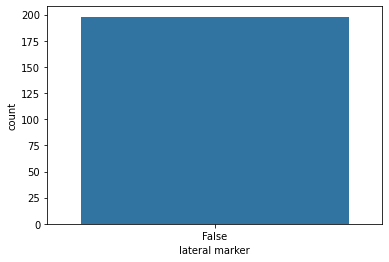

In [23]:
#| echo: true
#| output: true

_ = sns.countplot(data=agg_carpus_dmplo_df_enriched_min_by_horse, x="lateral marker")

What is the distribution of margin in the radiographs?

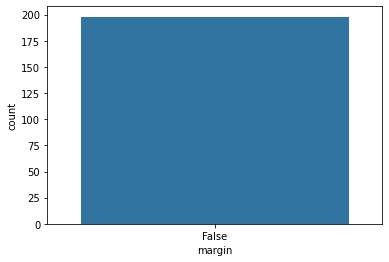

In [24]:
#| echo: true
#| output: true

_ = sns.countplot(data=agg_carpus_dmplo_df_enriched_min_by_horse, x="margin")

What is the distribution of first carpal bone in the radiographs?

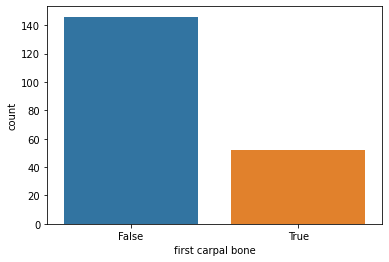

In [25]:
#| echo: true
#| output: true

_ = sns.countplot(data=agg_carpus_dmplo_df_enriched_min_by_horse, x="first carpal bone")

The presence of first carpal bone is observed in less than 25% of the radiographs (@tbl-carpus-dmplo).

In [26]:
#| echo: true
#| output: true

g = agg_carpus_dmplo_df_enriched_min_by_horse.groupby("first carpal bone")

g_summary = g.aggregate(
    size=("image", "size"),
).reset_index()

g_summary["percentage"] = g_summary["size"] * 100 / g_summary["size"].sum()

In [27]:
#| output: true
#| label: tbl-carpus-dmplo
#| tbl-cap: Summarise statistics of carpus DMPLO radiographs

g_summary_style = g_summary.style
g_summary_style.hide(axis="index")
g_summary_style.format(precision=1)

## Training, Validation, and Test Sets

The sets should represent the distribution of radiographs with the first carpal bone and side marker.

In [28]:
#| echo: true

import sklearn.model_selection

N_FOLDS = 6
KFOLDS = [set() for i in range(N_FOLDS)]
IDS_ASSIGNED = []
RANDOM_STATE = 8

np.random.seed(RANDOM_STATE)

df = agg_carpus_dmplo_df_enriched_min_by_horse.copy()

set_ids = df[df["first carpal bone"] == True].horse_id

set_ids_shuffled = set_ids.to_numpy()
np.random.shuffle(set_ids_shuffled)
kfolds = np.array_split(set_ids_shuffled, N_FOLDS)

print(f"Total {len(set_ids)}")
for i in range(N_FOLDS):
    KFOLDS[i].update(kfolds[i].tolist())
    print(f"{i} {kfolds[i].shape}")

IDS_ASSIGNED.extend(set_ids)

df = df.loc[~df.horse_id.isin(IDS_ASSIGNED)]

set_ids = df[df["side marker"] == True].horse_id

set_ids_shuffled = set_ids.to_numpy()
np.random.shuffle(set_ids_shuffled)
kfolds = np.array_split(set_ids_shuffled, N_FOLDS)
print(f"Total {len(set_ids)}")
for i in range(N_FOLDS):
    idx = -i - 1
    KFOLDS[i].update(kfolds[idx].tolist())
    print(f"{i} {kfolds[idx].shape}")


IDS_ASSIGNED.extend(set_ids)

df = df.loc[~df.horse_id.isin(IDS_ASSIGNED)]

set_ids = df.horse_id

set_ids_shuffled = set_ids.to_numpy()
np.random.shuffle(set_ids_shuffled)
kfolds = np.array_split(set_ids_shuffled, N_FOLDS)
print(f"Total {len(set_ids)}")

for i in range(N_FOLDS):
    KFOLDS[i].update(kfolds[i].tolist())
    print(f"{i} {kfolds[i].shape}")


IDS_ASSIGNED.extend(set_ids)

df = df.loc[~df.index.isin(IDS_ASSIGNED)]

Total 52
0 (9,)
1 (9,)
2 (9,)
3 (9,)
4 (8,)
5 (8,)
Total 33
0 (5,)
1 (5,)
2 (5,)
3 (6,)
4 (6,)
5 (6,)
Total 113
0 (19,)
1 (19,)
2 (19,)
3 (19,)
4 (19,)
5 (18,)


k-folds must have the same size.

In [29]:
pivot = None
MAX_FOLD_SIZE = agg_carpus_dmplo_df_enriched_min_by_horse.shape[0] / N_FOLDS
for i in range(N_FOLDS):
    if len(KFOLDS[i]) > MAX_FOLD_SIZE:
        pivot = KFOLDS[i].pop()
    elif len(KFOLDS[i]) < MAX_FOLD_SIZE and pivot is not None:
        KFOLDS[i].add(pivot)

In [30]:
agg_carpus_dmplo_df_enriched_min_by_horse.shape[0]

198

In [31]:
kfold_info = dict()

In [32]:
for i in range(N_FOLDS):
    print(f"{i} {len(KFOLDS[i])}")

0 33
1 33
2 33
3 33
4 33
5 33


Let's add the fold information to the dataframe.

In [33]:
for i in range(N_FOLDS):
    for j in KFOLDS[i]:
        kfold_info[j] = i

In [34]:
agg_carpus_dmplo_df_enriched_min_by_horse[
    "kfold"
] = agg_carpus_dmplo_df_enriched_min_by_horse["horse_id"].map(kfold_info)

In [35]:
SIZE_GROUP = [1, 2, 3, 4, 5, 6, 7, 8]

df = agg_carpus_dmplo_df_enriched_min_by_horse.copy()
for i in SIZE_GROUP:
    g = df.groupby(["kfold", "first carpal bone"])
    v = g.sample(n=i, random_state=RANDOM_STATE)
    column_name = f"n={i}"
    v[column_name] = True
    df = df.merge(v.loc[:, ["horse_id", column_name]], how="outer", on="horse_id")

In [36]:
df

horse_id  image  height  width  uncollimated beam  side marker  \
0       0000   True    True   True               True        False   
1       0001   True    True   True               True        False   
2       0002   True    True   True               True        False   
3       0003   True    True   True               True        False   
4       0004   True    True   True               True        False   
..       ...    ...     ...    ...                ...          ...   
193     0207   True    True   True               True        False   
194     0208   True    True   True              False        False   
195     0209   True    True   True               True        False   
196     0210   True    True   True               True        False   
197     0211   True    True   True               True        False   

     lateral marker  margin  first carpal bone  kfold  n=1  n=2   n=3   n=4  \
0             False   False              False      0  NaN  NaN   NaN   NaN   
1             False   False              False      0  NaN  NaN   NaN   NaN   
2             False   False              False      2  NaN  NaN   NaN   NaN   
3             False   False              False      1  NaN  NaN   NaN   NaN   
4             False   False              False      1  NaN  NaN   NaN  True   
..              ...     ...                ...    ...  ...  ...   ...   ...   
193           False   False              False      0  NaN  NaN   NaN   NaN   
194           False   False              False      2  NaN  NaN   NaN   NaN   
195           False   False              False      4  NaN  NaN  True  True   
196           False   False              False      5  NaN  NaN   NaN   NaN   
197           False   False              False      2  NaN  NaN   NaN   NaN   

      n=5   n=6   n=7   n=8  
0    True  True  True  True  
1     NaN   NaN   NaN   NaN  
2     NaN   NaN   NaN   NaN  
3     NaN   NaN   NaN   NaN  
4    True  True  True  True  
..    ...   ...   ...   ...  
193   NaN   NaN   NaN   NaN  
194   NaN   NaN   NaN   NaN  
195  True  True  True  True  
196   NaN   NaN   NaN   NaN  
197   NaN   NaN   NaN   NaN  

[198 rows x 18 columns]

In [37]:
SIZE_GROUP = [9, 10, 11, 12, 13, 14, 15, 16]

In [38]:
g = df.groupby(["kfold", "first carpal bone"])

In [39]:
g.get_group((0, True))

horse_id  image  height  width  uncollimated beam  side marker  \
7       0007   True    True   True              False        False   
8       0008   True    True   True              False        False   
74      0081   True    True   True              False        False   
97      0105   True    True   True              False         True   
115     0123   True    True   True               True        False   
133     0143   True    True   True               True        False   
175     0189   True    True   True               True        False   
189     0203   True    True   True              False         True   
190     0204   True    True   True              False         True   

     lateral marker  margin  first carpal bone  kfold   n=1   n=2   n=3   n=4  \
7             False   False               True      0   NaN  True  True  True   
8             False   False               True      0   NaN   NaN   NaN   NaN   
74            False   False               True      0   NaN   NaN   NaN   NaN   
97            False   False               True      0   NaN   NaN   NaN   NaN   
115           False   False               True      0  True  True  True  True   
133           False   False               True      0   NaN   NaN   NaN   NaN   
175           False   False               True      0   NaN   NaN  True  True   
189           False   False               True      0   NaN   NaN   NaN   NaN   
190           False   False               True      0   NaN   NaN   NaN  True   

      n=5   n=6   n=7   n=8  
7    True  True  True  True  
8    True  True  True  True  
74    NaN  True  True  True  
97    NaN   NaN  True  True  
115  True  True  True  True  
133   NaN   NaN   NaN   NaN  
175  True  True  True  True  
189   NaN   NaN   NaN  True  
190  True  True  True  True

In [40]:
for size_group in SIZE_GROUP:
    kfold2concat = []
    for i in range(N_FOLDS):
        column_name = f"n={size_group}"
        sample_size = (2 * size_group) - g.get_group((i, True)).shape[0]
        if sample_size == 0:
            v_positive = g.get_group((i, True))
            v_positive.loc[:, column_name] = True

            v = pd.concat([v_positive])
        else:
            v_positive = g.get_group((i, True))
            v_positive.loc[:, column_name] = True
            v_negative = g.get_group((i, False)).sample(
                n=sample_size, random_state=RANDOM_STATE
            )
            v_negative.loc[:, column_name] = True

            v = pd.concat([v_positive, v_negative])

        kfold2concat.append(v)

    v = pd.concat(kfold2concat)
    df = df.merge(v.loc[:, ["horse_id", column_name]], how="outer", on="horse_id")

/tmp/ipykernel_763792/56624108.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_positive.loc[:, column_name] = True
/tmp/ipykernel_763792/56624108.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_positive.loc[:, column_name] = True
/tmp/ipykernel_763792/56624108.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [41]:
df

horse_id  image  height  width  uncollimated beam  side marker  \
0       0000   True    True   True               True        False   
1       0001   True    True   True               True        False   
2       0002   True    True   True               True        False   
3       0003   True    True   True               True        False   
4       0004   True    True   True               True        False   
..       ...    ...     ...    ...                ...          ...   
193     0207   True    True   True               True        False   
194     0208   True    True   True              False        False   
195     0209   True    True   True               True        False   
196     0210   True    True   True               True        False   
197     0211   True    True   True               True        False   

     lateral marker  margin  first carpal bone  kfold  ...   n=7   n=8   n=9  \
0             False   False              False      0  ...  True  True  True   
1             False   False              False      0  ...   NaN   NaN   NaN   
2             False   False              False      2  ...   NaN   NaN  True   
3             False   False              False      1  ...   NaN   NaN  True   
4             False   False              False      1  ...  True  True   NaN   
..              ...     ...                ...    ...  ...   ...   ...   ...   
193           False   False              False      0  ...   NaN   NaN   NaN   
194           False   False              False      2  ...   NaN   NaN   NaN   
195           False   False              False      4  ...  True  True   NaN   
196           False   False              False      5  ...   NaN   NaN   NaN   
197           False   False              False      2  ...   NaN   NaN   NaN   

     n=10  n=11  n=12  n=13  n=14  n=15  n=16  
0    True  True  True  True  True  True  True  
1     NaN  True  True  True  True  True  True  
2    True  True  True  True  True  True  True  
3    True  True  True  True  True  True  True  
4     NaN  True  True  True  True  True  True  
..    ...   ...   ...   ...   ...   ...   ...  
193   NaN  True  True  True  True  True  True  
194  True  True  True  True  True  True  True  
195   NaN  True  True  True  True  True  True  
196   NaN  True  True  True  True  True  True  
197   NaN  True  True  True  True  True  True  

[198 rows x 26 columns]

In [42]:
experiment_column_names = []
for column_name in df.columns:
    if column_name.startswith("n="):
        experiment_column_names.append(column_name)

In [43]:
experiment_column_names

['n=1',
 'n=2',
 'n=3',
 'n=4',
 'n=5',
 'n=6',
 'n=7',
 'n=8',
 'n=9',
 'n=10',
 'n=11',
 'n=12',
 'n=13',
 'n=14',
 'n=15',
 'n=16']

In [44]:
agg_carpus_dmplo_df_enriched_min_by_horse = (
    agg_carpus_dmplo_df_enriched_min_by_horse.merge(
        df.loc[
            :,
            ["horse_id"] + experiment_column_names,
        ],
        how="outer",
        on="horse_id",
    )
)

In [45]:
agg_carpus_dmplo_df_enriched_min_by_horse = (
    agg_carpus_dmplo_df_enriched_min_by_horse.fillna(False)
)

In [46]:
agg_carpus_dmplo_df_enriched_min_by_horse

horse_id  image  height  width  uncollimated beam  side marker  \
0       0000   True    True   True               True        False   
1       0001   True    True   True               True        False   
2       0002   True    True   True               True        False   
3       0003   True    True   True               True        False   
4       0004   True    True   True               True        False   
..       ...    ...     ...    ...                ...          ...   
193     0207   True    True   True               True        False   
194     0208   True    True   True              False        False   
195     0209   True    True   True               True        False   
196     0210   True    True   True               True        False   
197     0211   True    True   True               True        False   

     lateral marker  margin  first carpal bone  kfold  ...    n=7    n=8  \
0             False   False              False      0  ...   True   True   
1             False   False              False      0  ...  False  False   
2             False   False              False      2  ...  False  False   
3             False   False              False      1  ...  False  False   
4             False   False              False      1  ...   True   True   
..              ...     ...                ...    ...  ...    ...    ...   
193           False   False              False      0  ...  False  False   
194           False   False              False      2  ...  False  False   
195           False   False              False      4  ...   True   True   
196           False   False              False      5  ...  False  False   
197           False   False              False      2  ...  False  False   

       n=9   n=10  n=11  n=12  n=13  n=14  n=15  n=16  
0     True   True  True  True  True  True  True  True  
1    False  False  True  True  True  True  True  True  
2     True   True  True  True  True  True  True  True  
3     True   True  True  True  True  True  True  True  
4    False  False  True  True  True  True  True  True  
..     ...    ...   ...   ...   ...   ...   ...   ...  
193  False  False  True  True  True  True  True  True  
194  False   True  True  True  True  True  True  True  
195  False  False  True  True  True  True  True  True  
196  False  False  True  True  True  True  True  True  
197  False  False  True  True  True  True  True  True  

[198 rows x 26 columns]

In [47]:
agg_carpus_dmplo_df_enriched_min_by_horse.loc[
    agg_carpus_dmplo_df_enriched_min_by_horse["n=1"],
]

horse_id  image  height  width  uncollimated beam  side marker  \
5       0005   True    True   True               True        False   
45      0049   True    True   True               True        False   
47      0052   True    True   True               True        False   
52      0057   True    True   True               True        False   
104     0112   True    True   True              False         True   
105     0113   True    True   True              False         True   
115     0123   True    True   True               True        False   
128     0136   True    True   True               True        False   
131     0141   True    True   True              False        False   
137     0147   True    True   True               True        False   
156     0167   True    True   True               True         True   
164     0176   True    True   True              False         True   

     lateral marker  margin  first carpal bone  kfold  ...   n=7   n=8    n=9  \
5             False   False              False      5  ...  True  True   True   
45            False   False              False      4  ...  True  True   True   
47            False   False               True      1  ...  True  True   True   
52            False   False              False      0  ...  True  True   True   
104           False   False               True      4  ...  True  True   True   
105           False   False              False      3  ...  True  True  False   
115           False   False               True      0  ...  True  True   True   
128           False   False               True      2  ...  True  True   True   
131           False   False              False      2  ...  True  True  False   
137           False   False              False      1  ...  True  True  False   
156           False   False               True      5  ...  True  True   True   
164           False   False               True      3  ...  True  True   True   

      n=10   n=11   n=12   n=13  n=14  n=15  n=16  
5     True   True   True   True  True  True  True  
45    True   True   True   True  True  True  True  
47    True   True   True   True  True  True  True  
52    True   True   True   True  True  True  True  
104   True   True   True   True  True  True  True  
105  False  False  False   True  True  True  True  
115   True   True   True   True  True  True  True  
128   True   True   True   True  True  True  True  
131  False  False  False   True  True  True  True  
137  False  False  False  False  True  True  True  
156   True   True   True   True  True  True  True  
164   True   True   True   True  True  True  True  

[12 rows x 26 columns]

In [48]:
carpus_dmplo_df_enriched_min = carpus_dmplo_df_enriched_min.merge(
    df.loc[
        :,
        ["horse_id", "kfold"] + experiment_column_names,
    ],
    how="outer",
    on="horse_id",
)

In [49]:
carpus_dmplo_df_enriched_min = carpus_dmplo_df_enriched_min.fillna(False)

In [50]:
carpus_dmplo_df_enriched_min

horse_id                          image  height  width  uncollimated beam  \
0       0000  r/fore-carpus/dmplo/0000.tiff    2560   2048               True   
1       0000  l/fore-carpus/dmplo/0000.tiff    2560   2048               True   
2       0001  r/fore-carpus/dmplo/0001.tiff    2560   2048               True   
3       0001  l/fore-carpus/dmplo/0001.tiff    2560   2048              False   
4       0002  l/fore-carpus/dmplo/0002.tiff    2136   1752              False   
..       ...                            ...     ...    ...                ...   
391     0209  l/fore-carpus/dmplo/0209.tiff    2560   2048               True   
392     0210  r/fore-carpus/dmplo/0210.tiff    2560   2048               True   
393     0210  l/fore-carpus/dmplo/0210.tiff    2560   2048              False   
394     0211  r/fore-carpus/dmplo/0211.tiff    2560   2048               True   
395     0211  l/fore-carpus/dmplo/0211.tiff    2560   2048               True   

     side marker  lateral marker  margin  first carpal bone  kfold  ...  \
0          False           False   False              False      0  ...   
1          False           False   False              False      0  ...   
2          False           False   False              False      0  ...   
3          False           False   False              False      0  ...   
4          False           False   False              False      2  ...   
..           ...             ...     ...                ...    ...  ...   
391        False           False   False              False      4  ...   
392        False           False   False              False      5  ...   
393        False           False   False              False      5  ...   
394        False           False   False              False      2  ...   
395        False           False   False              False      2  ...   

       n=7    n=8    n=9   n=10  n=11  n=12  n=13  n=14  n=15  n=16  
0     True   True   True   True  True  True  True  True  True  True  
1     True   True   True   True  True  True  True  True  True  True  
2    False  False  False  False  True  True  True  True  True  True  
3    False  False  False  False  True  True  True  True  True  True  
4    False  False   True   True  True  True  True  True  True  True  
..     ...    ...    ...    ...   ...   ...   ...   ...   ...   ...  
391   True   True  False  False  True  True  True  True  True  True  
392  False  False  False  False  True  True  True  True  True  True  
393  False  False  False  False  True  True  True  True  True  True  
394  False  False  False  False  True  True  True  True  True  True  
395  False  False  False  False  True  True  True  True  True  True  

[396 rows x 26 columns]

# YOLO

In [51]:
import os
import re
import shutil

Generate cross validation data folders.

In [52]:
experiment_column_names = []
for column_name in carpus_dmplo_df_enriched_min.columns:
    if column_name.startswith("n="):
        experiment_column_names.append(column_name)

In [53]:
experiment_column_names

['n=1',
 'n=2',
 'n=3',
 'n=4',
 'n=5',
 'n=6',
 'n=7',
 'n=8',
 'n=9',
 'n=10',
 'n=11',
 'n=12',
 'n=13',
 'n=14',
 'n=15',
 'n=16']

In [54]:
for _dir in os.listdir("../data"):
    if _dir.find("n=") != -1:
        shutil.rmtree(os.path.join("../data", _dir))

In [55]:
this_size = agg_carpus_dmplo_df_enriched_min_by_horse.loc[
    (
        agg_carpus_dmplo_df_enriched_min_by_horse["horse_id"]
        == '0001'
    ),
    'n=1',
].values[0]
this_fold = agg_carpus_dmplo_df_enriched_min_by_horse.loc[
    (
        agg_carpus_dmplo_df_enriched_min_by_horse["horse_id"]
        == '0001'
    ),
    "kfold",
].values[0]

In [56]:
source = "../data-raw/First Carpal Bone (DMPLO) Detection YOLO"

for column_name in experiment_column_names:
    for i in range(N_FOLDS - 1):
        destination = (
            f"../data/First Carpal Bone (DMPLO) Detection YOLO {column_name} {i}"
        )
        try:
            os.mkdir(destination)
        except FileExistsError:
            pass

        for filename in os.listdir(source):
            full_filename = os.path.join(source, filename)
            if os.path.isfile(full_filename):
                shutil.copyfile(full_filename, os.path.join(destination, filename))

            else:
                _source = full_filename
                _destination = os.path.join(destination, filename)

                # print(f"Processing {full_filename}")
                try:
                    os.mkdir(_destination)
                    os.mkdir(os.path.join(_destination, "train"))
                    os.mkdir(os.path.join(_destination, "val"))
                    os.mkdir(os.path.join(_destination, "test"))
                except FileExistsError:
                    pass
                for _filename in os.listdir(_source):
                    _full_filename = os.path.join(_source, _filename)
                    if os.path.isfile(_full_filename):
                        try:
                            horse_id = re.search("[0-9]{4}", _filename).group(0)
                        except:
                            print(f"Regex for {_full_filename} failed")
                            continue

                        this_size = agg_carpus_dmplo_df_enriched_min_by_horse.loc[
                            (
                                agg_carpus_dmplo_df_enriched_min_by_horse["horse_id"]
                                == horse_id
                            ),
                            column_name,
                        ].values[0]
                        this_fold = agg_carpus_dmplo_df_enriched_min_by_horse.loc[
                            (
                                agg_carpus_dmplo_df_enriched_min_by_horse["horse_id"]
                                == horse_id
                            ),
                            "kfold",
                        ].values[0]

                        _destination_filename = None
                        if this_fold == N_FOLDS - 1:
                            _destination_filename = os.path.join(
                                _destination, "test", _filename
                            )
                        elif this_fold == i:
                            _destination_filename = os.path.join(
                                _destination, "val", _filename
                            )
                        elif this_size:
                            _destination_filename = os.path.join(
                                _destination, "train", _filename
                            )
                        else:
                            pass

                        if _destination_filename is not None:
                            shutil.copyfile(_full_filename, _destination_filename)

In [57]:
agg_carpus_dmplo_df_enriched_min_by_horse.loc[
    (agg_carpus_dmplo_df_enriched_min_by_horse["horse_id"] == "0000"), "n=1"
].values[0]

False

## Export

The information need to be saved as CSV for future use.

In [58]:
#| echo: true
#| output: false

carpus_dmplo_df_enriched_min.to_csv(
    "../data/First Carpal Bone Classification.csv", index=None
)